In [1]:
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [6]:
data = pd.read_excel("Emloyee attrition intern data.xlsx")

In [7]:
data.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Status
0,2001,0.58,0.74,4,215,3,0,0,sales,low,0
1,2002,0.82,0.67,2,202,3,0,0,sales,low,0
2,2003,0.45,0.69,5,193,3,0,0,sales,low,0
3,2004,0.78,0.82,5,247,3,0,0,sales,low,0
4,2005,0.49,0.60,3,214,2,0,0,sales,low,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  Status                 14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [9]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size = 0.3, random_state = 0)

In [10]:
data_train.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Status
count,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000,10499.000000
mean,7473.760453,0.612976,0.716156,3.805315,200.921040,3.503477,0.146871,0.021526,0.238118
std,4328.158326,0.249333,0.171070,1.231302,50.013593,1.461014,0.353994,0.145136,0.425952
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3731.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7422.000000,0.650000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11216.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14998.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [11]:
data_train.head(9)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Status
10438,13222,0.62,0.91,3,269,8,0,0,support,medium,0
9236,11237,0.92,0.85,3,207,2,0,0,support,low,0
818,2819,0.64,0.90,2,101,6,0,0,IT,low,0
11503,76,0.11,0.79,7,306,4,0,0,product_mng,medium,1
11721,294,0.11,0.91,6,308,4,1,0,IT,low,1
5276,7277,0.58,0.83,4,207,3,0,0,sales,low,0
6863,8864,0.65,0.66,3,164,2,0,0,sales,low,0
13462,12035,0.84,0.87,4,246,6,0,0,hr,low,1
11975,548,0.37,0.50,2,141,3,0,0,sales,low,1


From the table above, we can note a few things. First of all, that we need to convert a lot of features into numeric ones later on, so that the machine learning algorithms can process them. Furthermore, we can see that the features have widely different ranges, that we will need to convert into roughly the same scale.

# Exploratory data analysis

In [12]:
status_list = data_train["Status"].tolist()

In [13]:
Emp_IDList = data_train["Emp ID"].tolist()

In [14]:
x = status_list
y = Emp_IDList

<AxesSubplot:xlabel='Status', ylabel='count'>

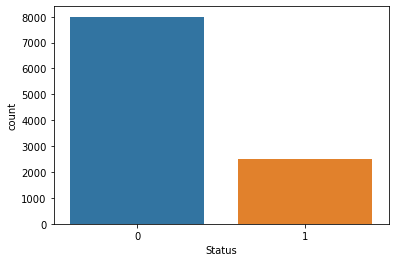

In [15]:
sns.countplot(x='Status',data=data_train)

From the above we can see that the target is unevenly distributed with an Attrition rate of about 30%!

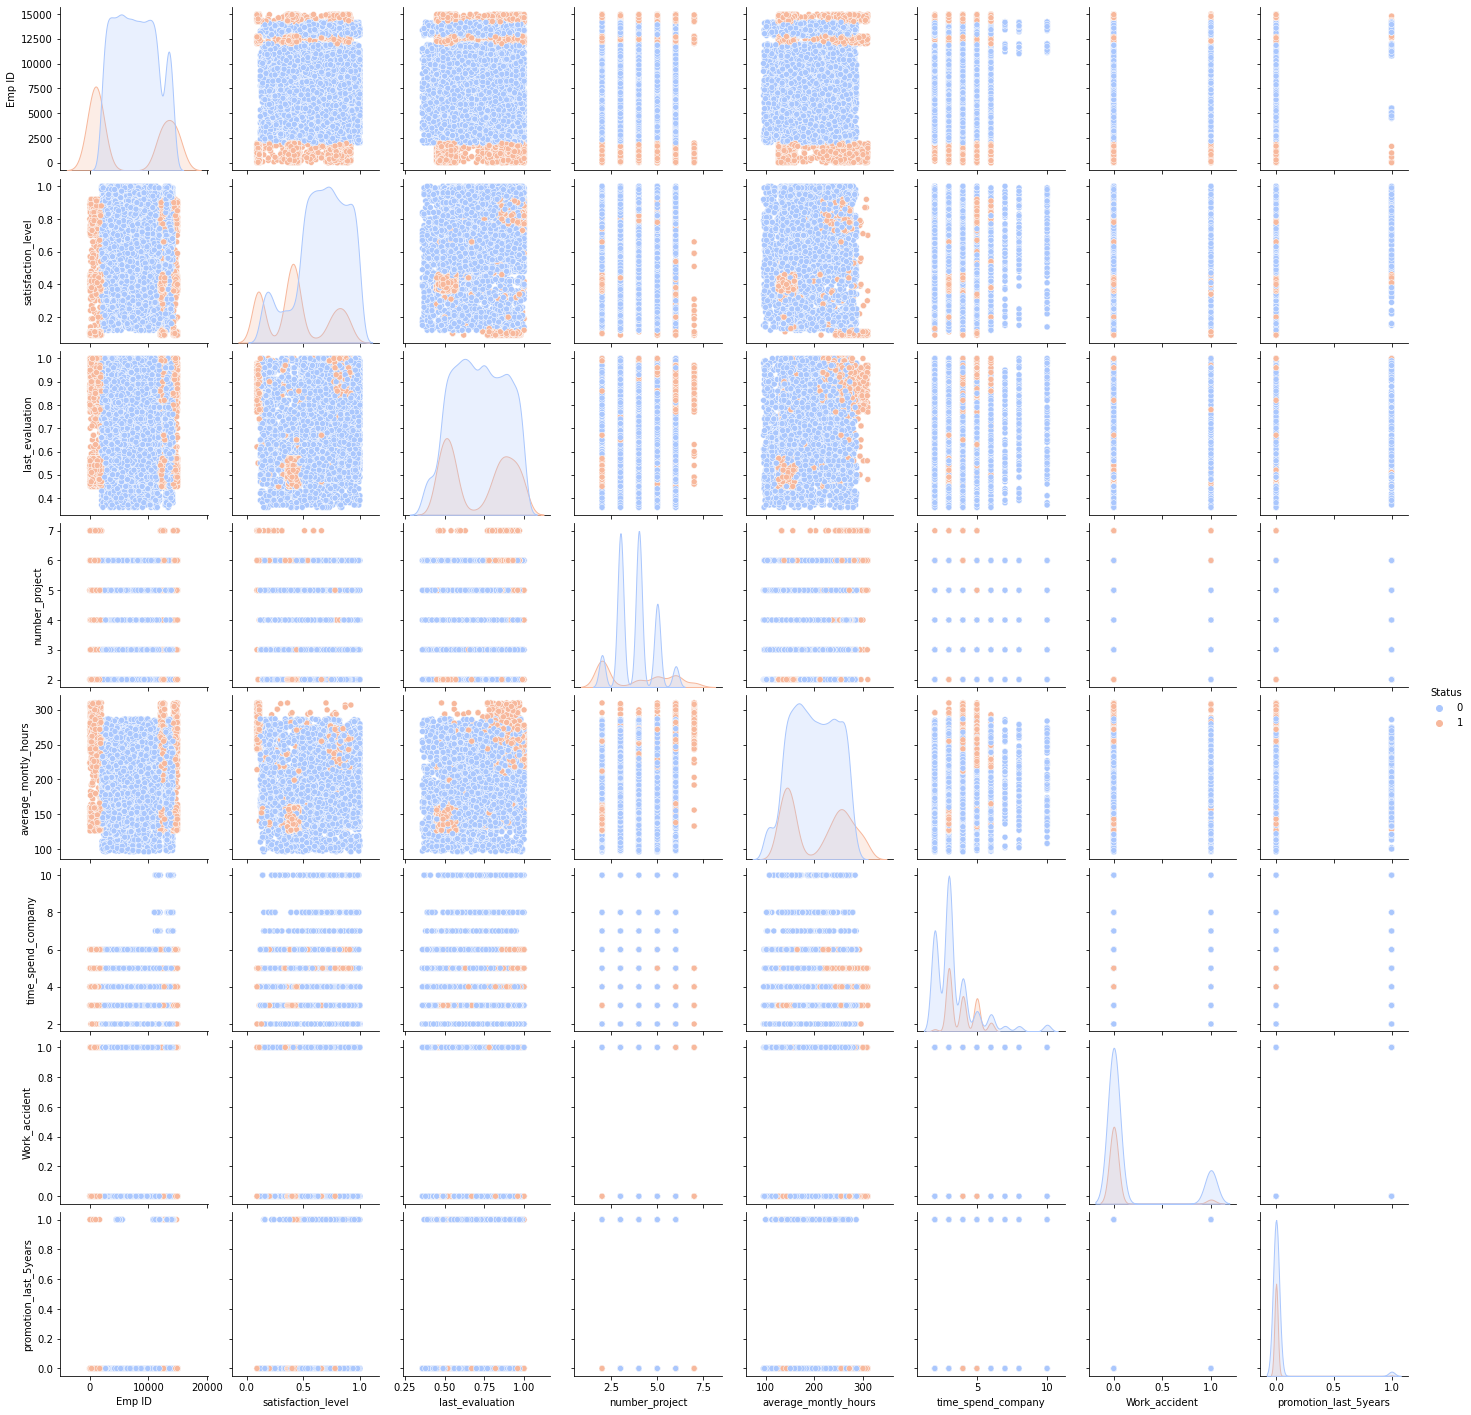

In [16]:
sns.pairplot(data_train,hue='Status',palette='coolwarm')

## Deductions from the pairplot

1. The amount of employee attrition is significantly higher in people with no promotion with last five years
2. Every employee that experienced a work accident left the company
3. Every employee with more than 150 average monthly hours and no promotion within the last five years left the company
4. Every employee handling a project yet with no promotion within last five years left the company
5. more than 90% of employee with no promotion had a less than 90% satisfaction level nd they all left the company
6. All staff with less than 6 years in the company that had a work accodent left the comapny, whlie 6 years was the threshold for leaving the company even with an accident
7. Both the last evaluation score and satisfaction level had little impact on the decision to leave the company once they had a work accident
8. Employees that spent fewer years in the company left more than those that stayed long
9. Every employee with a project and more than 150 working hhours left the company
10. Every employee with a project and less than 6 years of service left the company
11. 99% of employee with a project and a hstory of work accident left the company
12. About 80% of employee with a number of project left the company with or without a promotion in the las five years

In [17]:
pd.value_counts(data_train.dept) #this counts the number of employees in each department

sales          2872
technical      1930
support        1571
IT              858
product_mng     631
marketing       613
RandD           556
accounting      531
hr              510
management      427
Name: dept, dtype: int64

<AxesSubplot:xlabel='Status', ylabel='count'>

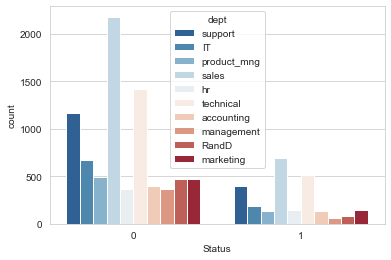

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Status',hue='dept',data=data_train,palette='RdBu_r')

<AxesSubplot:xlabel='Work_accident', ylabel='count'>

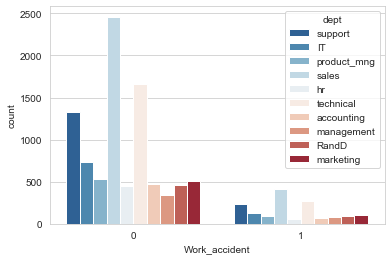

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='Work_accident',hue='dept',data=data_train,palette='RdBu_r')


The above reveals an even distribution of the attrition rate across tthe departments with the sales and technical departments having the highest number of attrition per staff. The occurence of work accident is also evenly distributed with the highly populated departments having the highest number of work accidents

<AxesSubplot:xlabel='dept', ylabel='Status'>

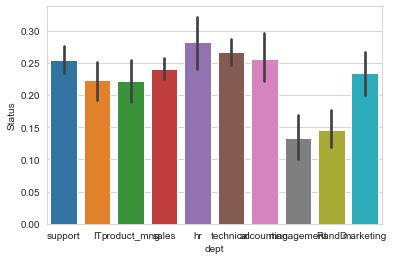

In [20]:
sns.barplot(x='dept', y='Status', data=data_train)

Here we can see that the department cntributes to a persons chance of attrition especially the Accounting,HR and Marketing dpartments with the highest no of attrition per staff

C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


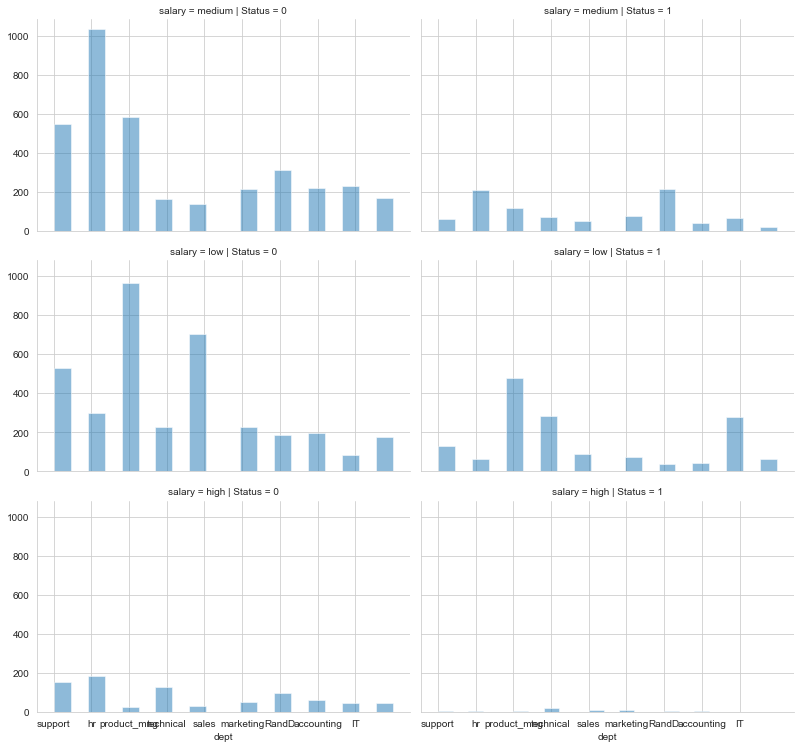

In [21]:
grid = sns.FacetGrid(data_train, col='Status', row='salary', size=3.5, aspect=1.6)
grid.map(plt.hist, 'dept', alpha=.5, bins=20)
grid.add_legend();

The above plot shows that more people with low and middle salary leave the company across all departments, with the product management department topping the chart. The technical department however showed a consistent attrition level across all salary scale indicating the possiblilty of a secondary factor. Finally only the technical, sales and marketing departments experienced an attrition in high income employees

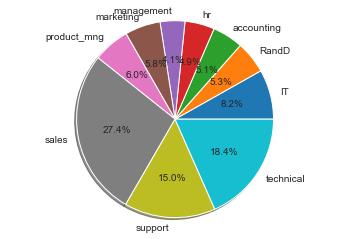

In [22]:
labels = data_train['dept'].astype('category').cat.categories.tolist()
counts = data_train['dept'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

## DATA PREPROCESSING


In [23]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10499 entries, 10438 to 2732
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 10499 non-null  int64  
 1   satisfaction_level     10499 non-null  float64
 2   last_evaluation        10499 non-null  float64
 3   number_project         10499 non-null  int64  
 4   average_montly_hours   10499 non-null  int64  
 5   time_spend_company     10499 non-null  int64  
 6   Work_accident          10499 non-null  int64  
 7   promotion_last_5years  10499 non-null  int64  
 8   dept                   10499 non-null  object 
 9   salary                 10499 non-null  object 
 10  Status                 10499 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


we need to convert the satisfaction and last evaluation column from float to integer

In [24]:
data = [data_train, data_test]#this convert float to integer

for dataset in data:
    dataset['satisfaction_level'] = dataset['satisfaction_level'].fillna(0)
    dataset['satisfaction_level'] = dataset['satisfaction_level'].astype(int)

In [25]:
data = [data_train, data_test]#this convert flaot to integer

for dataset in data:
    dataset['last_evaluation'] = dataset['last_evaluation'].fillna(0)
    dataset['last_evaluation'] = dataset['last_evaluation'].astype(int)

we then convert the categorical features to numeric

In [26]:
dept_list = data_train["dept"].tolist()


In [27]:
dept_list = list(dict.fromkeys(dept_list))#this creates a list of the various departments
print(dept_list)

['support', 'IT', 'product_mng', 'sales', 'hr', 'technical', 'accounting', 'management', 'RandD', 'marketing']


In [28]:
salary_list = data_train["salary"].tolist()

In [29]:
salary_list = list(dict.fromkeys(salary_list))#this creates a list of the salary scales
print(salary_list)

['medium', 'low', 'high']


In [30]:
quaters = {"sales": 0, "accounting": 1, "hr": 3, "technical": 4, "support": 5, "IT": 6, "product_mng": 7, "RandD": 8, "marketing": 9, "management": 10}#this converts salary to numeric
data = [data_train, data_test]

for dataset in data:
    dataset['dept'] = dataset['dept'].map(quaters)

The above converts the department to numeric values

In [31]:
data_train.head(15)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Status
10438,13222,0,0,3,269,8,0,0,5,medium,0
9236,11237,0,0,3,207,2,0,0,5,low,0
818,2819,0,0,2,101,6,0,0,6,low,0
11503,76,0,0,7,306,4,0,0,7,medium,1
11721,294,0,0,6,308,4,1,0,6,low,1
5276,7277,0,0,4,207,3,0,0,0,low,0
6863,8864,0,0,3,164,2,0,0,0,low,0
13462,12035,0,0,4,246,6,0,0,3,low,1
11975,548,0,0,2,141,3,0,0,0,low,1
11461,34,0,0,2,140,3,0,0,3,low,1


In [33]:
data_train_onehot = data_train #this encodes the salary using onehot encoder
data_train_onehot = pd.get_dummies(data_train_onehot, columns=['salary'], prefix = ['salary'])
print(data_train_onehot.head())

       Emp ID  satisfaction_level  last_evaluation  number_project  \
10438   13222                   0                0               3   
9236    11237                   0                0               3   
818      2819                   0                0               2   
11503      76                   0                0               7   
11721     294                   0                0               6   

       average_montly_hours  time_spend_company  Work_accident  \
10438                   269                   8              0   
9236                    207                   2              0   
818                     101                   6              0   
11503                   306                   4              0   
11721                   308                   4              1   

       promotion_last_5years  dept  Status  salary_high  salary_low  \
10438                      0     5       0            0           0   
9236                       0     5      

In [34]:
data_test_onehot = data_test # same as above
data_test_onehot = pd.get_dummies(data_test_onehot, columns=['salary'], prefix = ['salary'])
print(data_test_onehot.head())

       Emp ID  satisfaction_level  last_evaluation  number_project  \
1670     3671                   0                0               5   
13378    1951                   0                0               4   
10233   13017                   0                0               2   
4719     6720                   0                0               2   
7003     9004                   0                1               4   

       average_montly_hours  time_spend_company  Work_accident  \
1670                    176                   3              0   
13378                   247                   6              0   
10233                   219                   2              0   
4719                    146                   2              0   
7003                    275                   3              0   

       promotion_last_5years  dept  Status  salary_high  salary_low  \
1670                       0     9       0            0           1   
13378                      0     4      

In [35]:
data_test = data_test_onehot

In [36]:
data_train = data_train_onehot

In [37]:
data_train.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,Status,salary_high,salary_low,salary_medium
10438,13222,0,0,3,269,8,0,0,5,0,0,0,1
9236,11237,0,0,3,207,2,0,0,5,0,0,1,0
818,2819,0,0,2,101,6,0,0,6,0,0,1,0
11503,76,0,0,7,306,4,0,0,7,1,0,0,1
11721,294,0,0,6,308,4,1,0,6,1,0,1,0


In [38]:
hours_list = data_train["average_montly_hours"].tolist() # this converts the average monthly hours to a list

In [39]:
hours_list = list(dict.fromkeys(hours_list))#this creates a list of the average monthly hours without repitation
print(hours_list)

[269, 207, 101, 306, 308, 164, 246, 141, 140, 232, 274, 201, 132, 152, 214, 202, 219, 233, 215, 245, 150, 157, 248, 267, 127, 130, 191, 155, 229, 146, 131, 266, 205, 102, 238, 170, 163, 212, 256, 250, 222, 265, 278, 159, 259, 292, 145, 224, 138, 166, 123, 254, 161, 243, 239, 165, 189, 139, 172, 240, 158, 262, 167, 261, 143, 264, 263, 225, 295, 210, 153, 247, 174, 208, 253, 162, 257, 178, 196, 194, 271, 154, 244, 173, 285, 185, 289, 258, 144, 279, 260, 169, 160, 236, 273, 171, 216, 128, 301, 206, 200, 180, 235, 198, 175, 199, 227, 148, 251, 242, 192, 234, 106, 305, 110, 182, 287, 226, 149, 231, 117, 218, 223, 105, 142, 221, 193, 268, 177, 300, 147, 137, 204, 135, 213, 176, 230, 275, 211, 183, 195, 293, 121, 252, 136, 188, 179, 270, 237, 249, 134, 286, 197, 209, 187, 151, 111, 181, 133, 299, 203, 125, 228, 103, 168, 272, 284, 156, 291, 120, 100, 186, 294, 107, 255, 104, 108, 190, 307, 184, 290, 276, 217, 281, 220, 282, 126, 280, 241, 109, 114, 113, 112, 129, 296, 298, 310, 115, 118, 116,

In [40]:
data = [data_train, data_test] # this creates a category from the average monthly hours column
for dataset in data:
    dataset.loc[ dataset['average_montly_hours'] <= 110, 'average_montly_hours'] = 0
    dataset.loc[(dataset['average_montly_hours'] > 110) & (dataset['average_montly_hours'] <= 142), 'average_montly_hours'] = 1
    dataset.loc[(dataset['average_montly_hours'] > 142) & (dataset['average_montly_hours'] <= 197), 'average_montly_hours'] = 2
    dataset.loc[(dataset['average_montly_hours'] > 197) & (dataset['average_montly_hours'] <= 223), 'average_montly_hours'] = 3
    dataset.loc[(dataset['average_montly_hours'] > 223) & (dataset['average_montly_hours'] <= 240), 'average_montly_hours'] = 4
    dataset.loc[(dataset['average_montly_hours'] > 240) & (dataset['average_montly_hours'] <= 389), 'average_montly_hours'] = 5
    dataset.loc[(dataset['average_montly_hours'] > 289) & (dataset['average_montly_hours'] <= 299), 'average_montly_hours'] = 6
    dataset.loc[ dataset['average_montly_hours'] > 299, 'average_montly_hours'] = 7


In [41]:
data_train

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,Status,salary_high,salary_low,salary_medium
10438,13222,0,0,3,5,8,0,0,5,0,0,0,1
9236,11237,0,0,3,3,2,0,0,5,0,0,1,0
818,2819,0,0,2,0,6,0,0,6,0,0,1,0
11503,76,0,0,7,5,4,0,0,7,1,0,0,1
11721,294,0,0,6,5,4,1,0,6,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,1696,0,0,5,5,5,0,0,0,1,0,1,0
3264,5265,0,0,5,4,2,0,0,9,0,0,1,0
9845,11846,0,0,5,2,3,0,0,10,0,1,0,0
10799,13583,0,0,3,2,2,0,0,0,0,0,1,0


In [42]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10499 entries, 10438 to 2732
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Emp ID                 10499 non-null  int64
 1   satisfaction_level     10499 non-null  int32
 2   last_evaluation        10499 non-null  int32
 3   number_project         10499 non-null  int64
 4   average_montly_hours   10499 non-null  int64
 5   time_spend_company     10499 non-null  int64
 6   Work_accident          10499 non-null  int64
 7   promotion_last_5years  10499 non-null  int64
 8   dept                   10499 non-null  int64
 9   Status                 10499 non-null  int64
 10  salary_high            10499 non-null  uint8
 11  salary_low             10499 non-null  uint8
 12  salary_medium          10499 non-null  uint8
dtypes: int32(2), int64(8), uint8(3)
memory usage: 1.1 MB


In [43]:
data_train = data_train.drop(['Emp ID'], axis=1)

## BUILDING THE MACHINE LEARNING MODELS

Now we will train several Machine Learning models and compare their results. Note that though the dataset provided labels for their testing-set, i dropped the status column so as to use the predictions on the training set to compare the algorithms with each other.

In [46]:
X_train = data_train.drop("Status", axis=1)
Y_train = data_train["Status"]
X_test  = data_test.drop("Emp ID", axis=1).copy()

## Random forest

In [47]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

## Logistic regression

In [48]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## K Nearest Neighbor

In [49]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

## Gaussian Naive Bayes

In [50]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

## SVM

In [51]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


## DECISION TREE

In [52]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [53]:
results = pd.DataFrame({                                                 #THIS PRINTS THE ACCURACY SCORE OF ALL THE MODELS
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian,
              acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
96.66,Decision Tree
96.65,Random Forest
95.48,KNN
75.89,Support Vector Machines
75.80,Logistic Regression
40.58,Naive Bayes


The Random and decision forest models has the highest accuracy of 96.65% and 96.66% respectively, but we will be going with the Random forest model and further optimize it

## K-FOLD CROSS VALIDATION

In [54]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.95142857 0.94       0.95047619 0.95428571 0.95047619 0.95333333
 0.95238095 0.93714286 0.93904762 0.94089609]
Mean: 0.9469467520087157
Standard Deviation: 0.006423086571565353


Our model has a average accuracy of 95% with a standard deviation of 0.006%

In [55]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
number_project,0.384
time_spend_company,0.306
average_montly_hours,0.166
dept,0.075
Work_accident,0.020
last_evaluation,0.017
salary_low,0.013
salary_high,0.010
salary_medium,0.006


<AxesSubplot:xlabel='feature'>

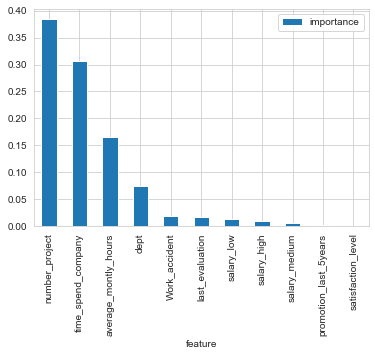

In [56]:
importances.plot.bar()

In [57]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

96.66 %


In [58]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[7689,  310],
       [ 260, 2240]], dtype=int64)

In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(Y_train,predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      7999
           1       0.88      0.90      0.89      2500

    accuracy                           0.95     10499
   macro avg       0.92      0.93      0.93     10499
weighted avg       0.95      0.95      0.95     10499



In [61]:
for i in range(0,len(X_test)):
  print (predictions[i])

0
0
0
1
1
0
0
1
1
1
0
0
0
0
0
0
0
0
1
0
1
0
0
0
1
0
0
1
0
1
1
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
1
0
0
1
1
0
0
1
0
1
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
1
0
0
0
1
1
0
0
1
0
1
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
1
1
0
1
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
1
0
0
1
0
0
1
0
1
1
0
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
1
0
1
1
0
0
0
0
0
1
0
1
1
0
1
1
0
0
1
0
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
1
0
1
1
0
0
1
0
0
1
1
0
1
0
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
1
0
0
1
0
0
1
0
0
1
0
0
1
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
1
1
1
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
1
0
1
0
1
0
0
0
1
0
0
1
0
1
0
0
1
0
0
0
0
0
1
0
1
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
1
0
0
0


In [63]:
emp_list = data_test["Emp ID"].tolist() #creates a list of Emp ID

In [64]:
Statue_list = predictions.tolist() #creates a list of predictions

In [65]:
s1=pd.Series(emp_list,name='EmployeeID')
s2=pd.Series(Statue_list,name='Statues')
submission = pd.concat([s1,s2], axis=1)

In [66]:
submission.to_csv("my_submission2.csv", index=False)